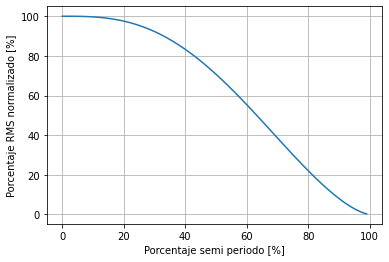

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *

frec, ampl = 1, 1
periode = 1 / frec
rms_unit = (np.sqrt(2) / 2) * ampl

def function(tInt_perc, bias=0):
    frec, ampl = 1, 1
    rms_unit   = (np.sqrt(2) / 2) * ampl
    rms_dimmer = fun_rms_simbolic(tInt_perc, frec=frec, amp=ampl) / rms_unit
    return rms_dimmer - bias

def plot():
    t_perc_serie = np.arange(0, 100, 1)
    vt_serie     = [(function(t) * 100) for t in range(100)]
    plt.plot(t_perc_serie, vt_serie)
    plt.xlabel("Porcentaje semi periodo [%]")
    plt.ylabel("Porcentaje RMS normalizado [%]")
    plt.grid()

plot()

In [19]:
from scipy.optimize import newton, bisect
root = bisect(function, 0, 100, args=(0.10))

for i in range(100):
    root = bisect(function, 0, 100.0, args=(i / 100))
    print("rms({:.4f}%)= {:.2f}%".format(root, function(root) * 100))


print("rms(half_periode * {:.2f}%)= {:.4f}%".
      format(root, function(root) * 100))

rms(1/2 per * 100.0000%)= 0.00%
rms(1/2 per * 97.5220%)= 1.00%
rms(1/2 per * 96.0640%)= 2.00%
rms(1/2 per * 94.8385%)= 3.00%
rms(1/2 per * 93.7422%)= 4.00%
rms(1/2 per * 92.7319%)= 5.00%
rms(1/2 per * 91.7846%)= 6.00%
rms(1/2 per * 90.8861%)= 7.00%
rms(1/2 per * 90.0268%)= 8.00%
rms(1/2 per * 89.1999%)= 9.00%
rms(1/2 per * 88.4004%)= 10.00%
rms(1/2 per * 87.6242%)= 11.00%
rms(1/2 per * 86.8684%)= 12.00%
rms(1/2 per * 86.1305%)= 13.00%
rms(1/2 per * 85.4083%)= 14.00%
rms(1/2 per * 84.7001%)= 15.00%
rms(1/2 per * 84.0045%)= 16.00%
rms(1/2 per * 83.3202%)= 17.00%
rms(1/2 per * 82.6461%)= 18.00%
rms(1/2 per * 81.9813%)= 19.00%
rms(1/2 per * 81.3248%)= 20.00%
rms(1/2 per * 80.6759%)= 21.00%
rms(1/2 per * 80.0340%)= 22.00%
rms(1/2 per * 79.3984%)= 23.00%
rms(1/2 per * 78.7686%)= 24.00%
rms(1/2 per * 78.1440%)= 25.00%
rms(1/2 per * 77.5243%)= 26.00%
rms(1/2 per * 76.9088%)= 27.00%
rms(1/2 per * 76.2973%)= 28.00%
rms(1/2 per * 75.6894%)= 29.00%
rms(1/2 per * 75.0847%)= 30.00%
rms(1/2 per * 74.